In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [3]:
df = pd.DataFrame()
df

""


In [4]:
def combine_df(new_df,index,is_military):
    global df
    new_df = new_df[['Reaction Time','display']].dropna()
    new_df['display'] = new_df['display'].loc[(new_df['display'].str.contains('Question'))]
    new_df = new_df[['Reaction Time','display']].dropna()
    new_df = new_df.transpose()
    new_df = new_df.rename(columns=new_df.iloc[1]).drop('display')
    new_df['Is Military'] = is_military
    new_df.rename(index={'Reaction Time': index},inplace=True)
    df = pd.concat([df,new_df],axis=0)

In [5]:
folders = ['MILITARY','NON MILITARY']
fn_index = 0
for f_index,folder in enumerate(folders):
    for filename in os.listdir(f'{folder}/'):
        new_df = pd.read_csv(f'{folder}/{filename}')
        combine_df(new_df,fn_index,f_index)
        fn_index+=1
df.to_csv('pattern.csv',index=False)

In [4]:
df = pd.read_csv('pattern.csv')

In [5]:
df.head()

,Question 1 - b4q1,Question 2 - b2p2,Question 3 - b3p4,Question 4 - b1p5,Question 5 - b4p2,Question 6 - b3p3,Question 7 - b1p1,Question 8 - b2p5,Question 9 - b4p3,Question 10 - b3p2,...,Question 12 - b1p2,Question 13 - b4p4,Question 14 - b1p4,Question 15 - b2p4,Question 16 - b3p5,Question 17 - b2p3,Question 18 - b4p5,Question 19 - b3p1,Question 20 - b1p3,Is Military
0,4016.080,5780.415,6394.105,2721.865,6566.160,2793.530,4361.015,1445.755,2003.060,1416.860,...,871.160,5742.335,788.620,1156.805,3045.690,1087.325,2959.585,833.735,926.790,0
1,54718.175,11608.845,7301.160,9669.085,3108.400,1780.710,3574.225,3127.660,1357.815,1352.355,...,1061.330,1278.970,1841.805,1196.900,3111.000,1079.955,3442.095,1139.100,830.125,0
2,6713.690,3150.330,1594.875,2866.770,7319.070,1979.100,2525.760,1710.735,1320.295,1386.925,...,1094.605,1883.760,886.115,2061.605,4624.785,3248.470,1778.535,1701.385,906.860,0
3,2730.065,1819.050,1311.315,2085.375,1184.265,1096.155,2553.750,831.955,1214.225,649.845,...,756.810,1015.000,1060.060,1996.565,2787.405,1494.775,1324.430,1317.345,857.035,0
4,3229.765,1416.570,1506.470,7317.295,1842.585,1597.305,2716.930,1371.425,1429.510,904.960,...,764.440,1078.075,888.435,1061.420,1654.735,1550.455,1669.425,1062.245,1122.125,0


In [6]:
df['Is Military'].value_counts()

1    12
0    10
Name: Is Military, dtype: int64

In [7]:
df = df.apply(pd.to_numeric)

In [8]:
df.isna().sum()

Question 1 - b4q1     0
Question 2 - b2p2     0
Question 3 - b3p4     0
Question 4 - b1p5     0
Question 5 - b4p2     0
Question 6 - b3p3     0
Question 7 - b1p1     0
Question 8 - b2p5     0
Question 9 - b4p3     0
Question 10 - b3p2    0
Question 11 - b2p1    0
Question 12 - b1p2    0
Question 13 - b4p4    0
Question 14 - b1p4    0
Question 15 - b2p4    0
Question 16 - b3p5    0
Question 17 - b2p3    0
Question 18 - b4p5    0
Question 19 - b3p1    0
Question 20 - b1p3    0
Is Military           0
dtype: int64

In [9]:
df_military = df[df['Is Military']==1].drop('Is Military',axis=1)
df_military

,Question 1 - b4q1,Question 2 - b2p2,Question 3 - b3p4,Question 4 - b1p5,Question 5 - b4p2,Question 6 - b3p3,Question 7 - b1p1,Question 8 - b2p5,Question 9 - b4p3,Question 10 - b3p2,Question 11 - b2p1,Question 12 - b1p2,Question 13 - b4p4,Question 14 - b1p4,Question 15 - b2p4,Question 16 - b3p5,Question 17 - b2p3,Question 18 - b4p5,Question 19 - b3p1,Question 20 - b1p3
10,4073.595,2037.185,2021.620,4952.070,5132.905,1609.860,4969.795,1324.185,1748.975,1366.545,1305.530,1401.780,1561.455,1341.000,4344.560,4671.000,2128.725,2065.180,2495.330,1515.320
11,2802.825,1353.925,1340.440,8413.400,2918.180,1876.910,3535.550,1102.585,1665.195,718.395,1148.890,925.235,2291.070,1334.475,1444.070,3231.330,1524.815,2649.135,2967.450,1749.920
12,3632.190,967.470,714.645,15733.735,1072.015,1157.980,1913.805,2050.255,1151.760,689.755,885.795,694.990,1087.245,701.150,2648.005,2052.810,917.570,2106.195,1257.405,1004.575
13,2483.255,1852.670,2620.410,12902.975,2064.040,6343.215,10169.760,7966.610,1290.190,993.745,1641.920,1366.315,1245.315,1556.140,1258.395,5114.855,969.315,1291.440,1033.545,966.235
14,2129.450,1172.410,1248.420,10026.225,1693.140,981.110,3205.950,1063.370,854.345,735.525,812.095,702.305,872.225,710.200,1531.940,1128.550,1349.355,2495.675,998.315,776.565
15,3310.110,1164.480,1317.275,6629.500,2404.230,1545.255,1948.215,803.910,1267.235,721.655,821.420,876.520,1199.480,710.355,4998.185,1591.375,996.050,1733.945,988.120,893.865
16,1353.445,1099.445,1103.275,1986.275,1287.820,1133.595,2826.895,2663.280,1197.435,848.120,1252.680,976.525,1280.295,1198.725,2451.480,1812.950,1184.780,16695.235,1424.580,1137.700
17,5096.980,2294.295,6756.300,2491.420,2389.970,1893.550,3945.105,2374.700,1919.815,1683.480,2178.085,1522.495,1685.835,1151.695,1153.135,3386.200,1460.830,1812.505,2629.750,994.545
18,2371.915,1236.760,1801.015,6710.410,1696.515,1579.250,5387.950,966.255,1045.250,828.605,1227.370,906.810,1086.290,667.165,993.185,15512.420,1068.465,1077.655,1897.525,1045.890
19,5341.440,896.255,863.430,6769.215,2198.305,862.125,2736.180,740.510,1622.535,680.140,800.245,887.745,1285.895,688.650,1032.290,906.620,990.725,1792.095,855.950,705.310


In [10]:
df_non_military = df[df['Is Military']==0].drop('Is Military',axis=1)
df_non_military

,Question 1 - b4q1,Question 2 - b2p2,Question 3 - b3p4,Question 4 - b1p5,Question 5 - b4p2,Question 6 - b3p3,Question 7 - b1p1,Question 8 - b2p5,Question 9 - b4p3,Question 10 - b3p2,Question 11 - b2p1,Question 12 - b1p2,Question 13 - b4p4,Question 14 - b1p4,Question 15 - b2p4,Question 16 - b3p5,Question 17 - b2p3,Question 18 - b4p5,Question 19 - b3p1,Question 20 - b1p3
0,4016.080,5780.415,6394.105,2721.865,6566.160,2793.530,4361.015,1445.755,2003.060,1416.860,1047.395,871.160,5742.335,788.620,1156.805,3045.690,1087.325,2959.585,833.735,926.790
1,54718.175,11608.845,7301.160,9669.085,3108.400,1780.710,3574.225,3127.660,1357.815,1352.355,1063.505,1061.330,1278.970,1841.805,1196.900,3111.000,1079.955,3442.095,1139.100,830.125
2,6713.690,3150.330,1594.875,2866.770,7319.070,1979.100,2525.760,1710.735,1320.295,1386.925,1071.115,1094.605,1883.760,886.115,2061.605,4624.785,3248.470,1778.535,1701.385,906.860
3,2730.065,1819.050,1311.315,2085.375,1184.265,1096.155,2553.750,831.955,1214.225,649.845,1065.565,756.810,1015.000,1060.060,1996.565,2787.405,1494.775,1324.430,1317.345,857.035
4,3229.765,1416.570,1506.470,7317.295,1842.585,1597.305,2716.930,1371.425,1429.510,904.960,941.850,764.440,1078.075,888.435,1061.420,1654.735,1550.455,1669.425,1062.245,1122.125
5,6446.940,3768.005,2409.665,4722.265,2490.460,2901.525,2592.740,1760.580,2570.625,1600.665,1233.600,960.015,1311.575,1272.225,1049.665,5018.440,1085.405,1047.180,2072.890,879.180
6,29055.700,2245.300,797.100,11655.300,3228.000,2001.800,3326.400,806.400,1303.500,3833.400,934.900,696.800,1398.400,705.800,2316.700,11468.500,3317.400,908.700,1505.400,752.600
7,5752.755,2086.470,1586.780,19170.440,1879.050,1401.200,1184.600,1412.635,1452.730,1077.990,1079.040,1126.790,1236.925,1134.840,1276.895,1790.380,1583.110,2803.370,1060.235,1056.440
8,13779.300,2234.605,1960.875,8588.590,2288.165,1803.285,2747.575,1953.665,1791.050,865.875,1030.340,1210.510,6526.330,3744.095,8127.800,1855.615,1605.485,10902.365,2524.075,937.585
9,13765.755,3258.410,2135.675,9936.635,5868.190,2144.005,9066.830,2887.240,1522.535,2378.555,1661.240,950.690,1410.115,978.310,2968.155,23489.840,1352.345,3793.880,5042.745,1230.455


In [11]:
df_military.mean().mean()

2322.788312499476

In [12]:
df_non_military.mean().mean()

3183.1325249996253

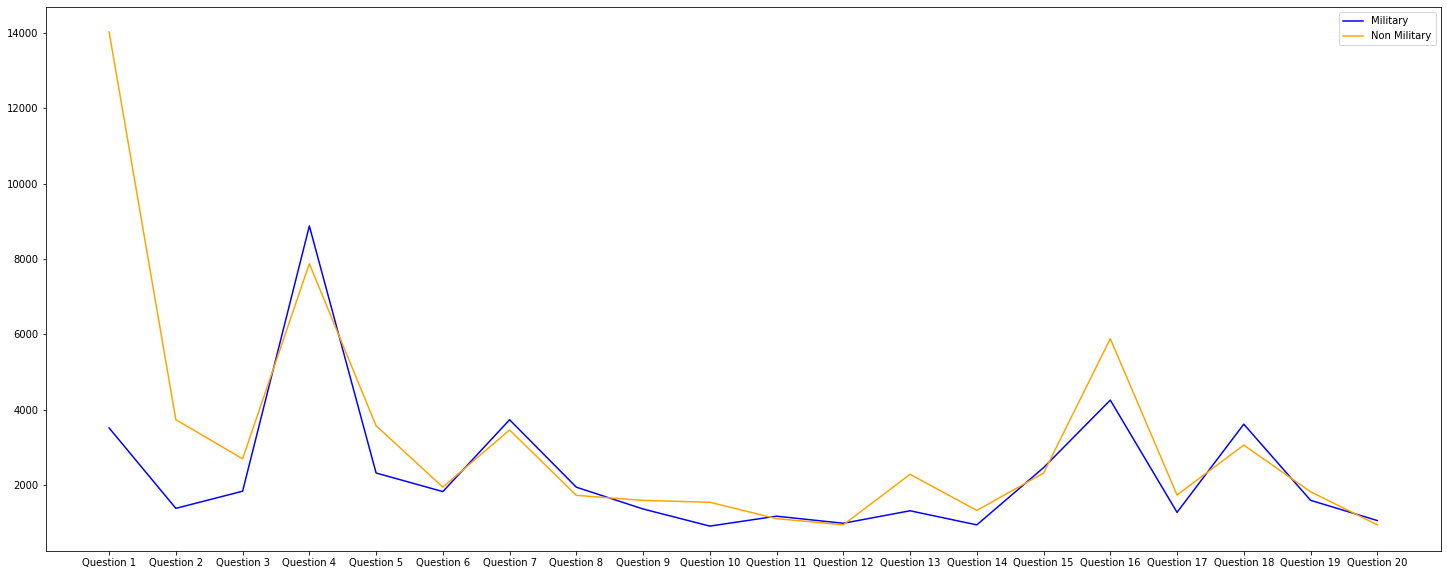

In [13]:
plt.figure(figsize=(25,10))
sns.lineplot(x=[name[:-7] for name in df_military.columns],y=df_military.mean(),color='blue')
sns.lineplot(x=[name[:-7] for name in df_non_military.columns],y=df_non_military.mean(),color='orange')

plt.legend(labels=['Military', 'Non Military'])

<AxesSubplot:>

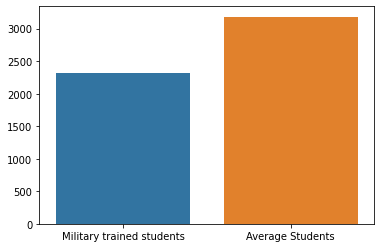

In [14]:
sns.barplot(y=[df_military.mean().mean(),df_non_military.mean().mean()],x=['Military trained students','Average Students',])

In [15]:
question_pattern = []
for i in range(1,5):
    question_pattern.append([])
    for j in range(1,6):
        for name in df.columns:
            if name[-3] == str(i) and name[-1] == str(j):
                question_pattern[i-1].append(df[name].mean())

In [38]:
df_background_pattern = pd.DataFrame(data=question_pattern,index=[15,5,10,20],columns=['Pattern 1','Pattern 2','Pattern 3','Pattern 4','Pattern 5'])
df_background_pattern.sort_index(inplace=True)

In [39]:
df_background_pattern

,Pattern 1,Pattern 2,Pattern 3,Pattern 4,Pattern 5
5,1148.173182,2454.356136,1489.030909,2399.398864,1848.850909
10,1702.422727,1202.307045,1884.452045,2230.992500,4996.236591
15,3612.568636,971.581364,1011.298864,1121.420227,8419.248636
20,8292.270227,2893.662955,1472.365682,1760.677955,3365.761818


In [40]:
df_background_pattern.idxmax(axis=1)

5     Pattern 2
10    Pattern 5
15    Pattern 5
20    Pattern 1
dtype: object

Text(0.5, 1.0, 'Reaction time for each pattern')

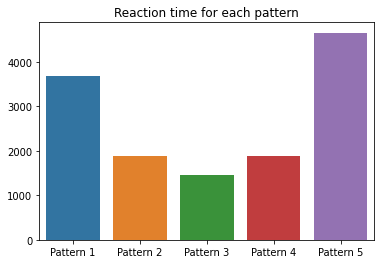

In [41]:
sns.barplot(y=df_background_pattern.mean(axis=0),x=df_background_pattern.columns)
plt.title('Reaction time for each pattern')

<AxesSubplot:xlabel='Number of distractors', ylabel='Reaction Time in ms'>

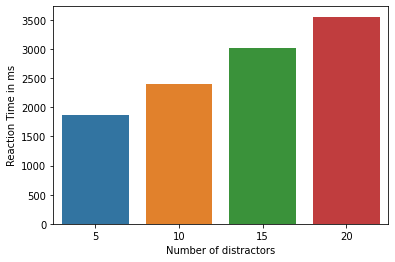

In [47]:
plt.ylabel('Reaction Time in ms')
plt.xlabel('Number of distractors')
sns.barplot(y=df_background_pattern.mean(axis=1),x=df_background_pattern.mean(axis=1).index)

<AxesSubplot:xlabel='Number of distractors', ylabel='Reaction Time in ms'>

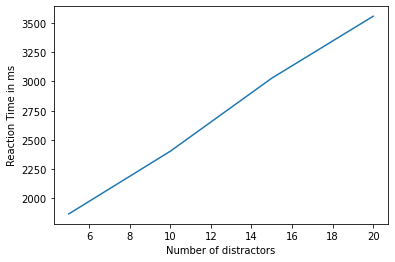

In [46]:
plt.ylabel('Reaction Time in ms')
plt.xlabel('Number of distractors')
sns.lineplot(x=[5,10,15,20],y=df_background_pattern.mean(axis=1))

<AxesSubplot:ylabel='Pattern 5'>

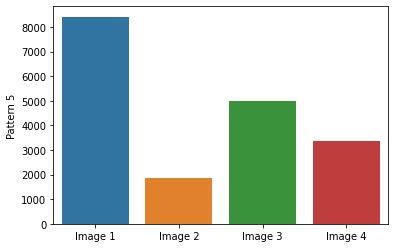

In [115]:
sns.barplot(y=df_background_pattern['Pattern 5'],x=df_background_pattern['Pattern 5'].index)

In [112]:
## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

## save 
cv2.imwrite("green.png", green)

True